# **Breast Cancer Prediction - Classification**

![img](https://miro.medium.com/v2/resize:fit:828/format:webp/1*pxFCmhRFTighUn88baLcSA.png)

## **Data / Problem Understanding**

> ### **Problem understanding:**
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

> ### **Objective:**
to develop a model that can accurately predict the likelihood of breast cancer in patients based on various medical factors.

> ### **Data Understanding:**
- The key challenges against it’s detection is how to classify tumors into "malignant (cancerous)" or "benign(non cancerous)".
- dataset contains information about various features of breast cancer cells and a corresponding classification of whether the cells are malignant or benign.

### **Load Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import time # get the execution time
# visualizations
import matplotlib.pyplot as plt # matplotlib - this is used for plotting the graphs
import seaborn as sns # seaborn - used for plot interactive graph. I like it most for plot
sns.set(style="whitegrid", color_codes=True, font_scale=1.3) # change plotting style using seaborn
# plotly - interactive plotting
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# feature selection
from sklearn.feature_selection import chi2, SelectKBest
# model selection
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
# metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, auc, roc_curve, precision_recall_curve, accuracy_score, balanced_accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### **Understand the data**

> #### **Attribute Information:**
- **ID number**
- **Diagnosis (M = malignant, B = benign)**
- **radius (mean of distances from center to points on the perimeter)**
- **texture (standard deviation of gray-scale values)**
- **perimeter**
- **area**
- **smoothness (local variation in radius lengths)**
- **compactness (perimeter^2 / area - 1.0)**
- **concavity (severity of concave portions of the contour)**
- **concave points (number of concave portions of the contour)**
- **symmetry**
- **fractal dimension ("coastline approximation" - 1)**

> #### **Attribute Interpretation:**
* The `mean`, `standard error (se)` and `worst` of these features were computed for each image, each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension), resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
* All feature values are recoded with four significant digits.
* Missing attribute values: none
* Class distribution: 357 benign, 212 malignant

### **Read and Analyse Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/ML/PROJECT/breast_cancer_prediction/cancer.csv')

Mounted at /content/drive


## **Data Processing / Preparation**

> It involves data cleaning, feature selection, data splitting, encoding categorical variables which leads to more accurate predictions.


### **Descriptive Statistics**

> **Structural Analysis:** Before we look into the content of the data, we first need to look into the general structure of the data , i.e., the number of rows (data points) and number of columns (features) in it.

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

def check_df(dataframe):
  print("##################### HEAD ######################")
  print(dataframe.head(),"\n")
  print("##################### TAIL ######################")
  print(dataframe.tail(),"\n")
  print("#################### INFO #######################")
  print(dataframe.info(),"\n")
  print("#################### SHAPE #######################")
  r , c = dataframe.shape
  print(f"The dataset consists of {r} samples and {c} features","\n")
  print("#################### COLUMNS #######################")
  print(*dataframe.columns,sep="\n")
  print("#################### DUPLICATES #######################")
  print(f"There are {dataframe.duplicated().sum()} duplicated values","\n")
  print("################## DESCRIBE NUMERICAL ####################")
  print(dataframe.describe().T,"\n")
  print("################## DESCRIBE CATEGORICAL ####################")
  print(dataframe.describe(include='O'),"\n")
  print("#################### NULL VALUES #########################")
  if dataframe.isnull().sum().sum() == 0:
    print("There are not any null values.")
  else:
    print("There are {} null values.".format(dataframe.isnull().sum().sum()))
  print("#################### UNIQUE VALUES #########################")
  print(dataframe.nunique().sort_values())
  print("#################### TARGET VALUES COUNTS #########################")
  print(dataframe['diagnosis'].value_counts().sort_values())

check_df(data)

##################### HEAD ######################
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302         M        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654

> getting the shape, size and column names

In [ ]:
data.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

> We have features but **what does they mean** or actually **how much do we need to know about these features** that we do not know, but we should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on in our data.

> For example , the question is appeared in my mind the **area_mean** feature's max value is 2501 and **smoothness_mean** features' max 0.16340. Therefore **do we need standardization or normalization before visualization, feature selection, feature extraction or classificaiton?** The answer is yes.

### **Inspect & Drop Missing values**

> visualizing missing values

In [ ]:
null_feat = pd.DataFrame(len(data['id']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

> As you can see we do not have any missing values except the last column.

### **Reassign target and drop useless features:**

> **There are 4 things that grabs the attention**
1. There is an **id** that cannot be used for classificaiton
2. **Diagnosis** is our class label
3. **Unnamed: 32** feature includes NaN so we do not need it.
4. We do not have any idea about other feature names actually we do not need to know for now.

> We will drop these values, even though it's not a feature selecting, it's just like browsing a pub, we did not choose our drinks yet !!!

In [ ]:
list = ['Unnamed: 32','id']
data = data.drop(list,axis = 1)
print(data.shape)
data.head()

(569, 31)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0         M        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601                  0.11890
1         M        20.57         17.77          132.90     1326.0          0.08474           0.07864          0.0869              0.07017         0.1812                 0.05667     0.5435      0.7339         3.398    74.08       0.005225         0.01308       0.01860            0.01340      0.01389              0.003532         24.99          23.41           158.80      1956.0            0.1238             0.1866           0.2416                0.1860          0.2750                  0.08902
2         M        19.69         21.25          130.00     1203.0          0.10960           0.15990          0.1974              0.12790         0.2069                 0.05999     0.7456      0.7869         4.585    94.03       0.006150         0.04006       0.03832            0.02058      0.02250              0.004571         23.57          25.53           152.50      1709.0            0.1444             0.4245           0.4504                0.2430          0.3613                  0.08758
3         M        11.42         20.38           77.58      386.1          0.14250           0.28390          0.2414              0.10520         0.2597                 0.09744     0.4956      1.1560         3.445    27.23       0.009110         0.07458       0.05661            0.01867      0.05963              0.009208         14.91          26.50            98.87       567.7            0.2098             0.8663           0.6869                0.2575          0.6638                  0.17300
4         M        20.29         14.34          135.10     1297.0          0.10030           0.13280          0.1980              0.10430         0.1809                 0.05883     0.7572      0.7813         5.438    94.44       0.011490         0.02461       0.05688            0.01885      0.01756              0.005115         22.54          16.67           152.20      1575.0            0.1374             0.2050           0.4000                0.1625          0.2364                  0.07678

### **Target Distribution**

> inspecting unique values and their value counts

In [ ]:
# getting the number of unique values
print(data['diagnosis'].unique())
# getting the lable unique values
print(data['diagnosis'].value_counts())
# getting the label value count

['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


> The column “diagnosis” has two values: Malignant and Benign. Machine learning models can be built on data that is made of just numbers. Hence, we will replace Malignant with number 1 and Benign with number 0. Any two numbers can be used but 0 and 1 are the most commonly used for classification purposes. Once replaced, the code df.diagnosis.unique() will serve as a check to that we get a resulting column of numbers 1 and 0.

In [ ]:
# our diagnosis column is a object type so we can map it to integer value
# 0 ==> malignant
# 1 ==> benign
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

> Let's now take a closer look at our response variable, since it is the main focus of our analysis. We begin by checking out the distribution of its classes.

In [ ]:
# count number of obvs in each class
benign, malignant = data['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(data) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(data) * 100, 2), '%')

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


In [ ]:
# Plotting the count
px.histogram(data, x='diagnosis', color="diagnosis", barmode='group')

In [ ]:
# Plot distribution using Plotly (interactive plotting)
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

# you can hover to get the count and the percentage of each class
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'],
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

> Out of the 569 observations, 357 (or 62.7%) have been labeled malignant, while the rest 212 (or 37.3%) have been labeled benign.


## **EDA (Explanatory Data Analysis)**

> Exploratory Data Analysis (EDA) involves descriptive statistics, correlation analysis, analyzing the various features of breast cancer cells and their classifications to gain insights into the data.

### **Kernal Subplot Correlation**

**Extracting Mean, Squared Error, and Worst Features**

> Dividing features into groups for easier kernal subplot readability


In [ ]:
features_mean = data.loc[:,'radius_mean':'fractal_dimension_mean']
features_se = data.loc[:,'radius_se':'fractal_dimension_se']
features_worst = data.loc[:,'radius_worst':'fractal_dimension_worst']

In [ ]:
features_mean.head(1)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean
0        17.99         10.38           122.8     1001.0           0.1184            0.2776          0.3001               0.1471         0.2419                 0.07871

In [ ]:
features_se.head(1)

radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se
0      1.095      0.9053         8.589    153.4       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193

In [ ]:
features_worst.head(1)

radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0         25.38          17.33            184.6      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601                   0.1189

### **Correlation of Mean Features with Diagnosis**

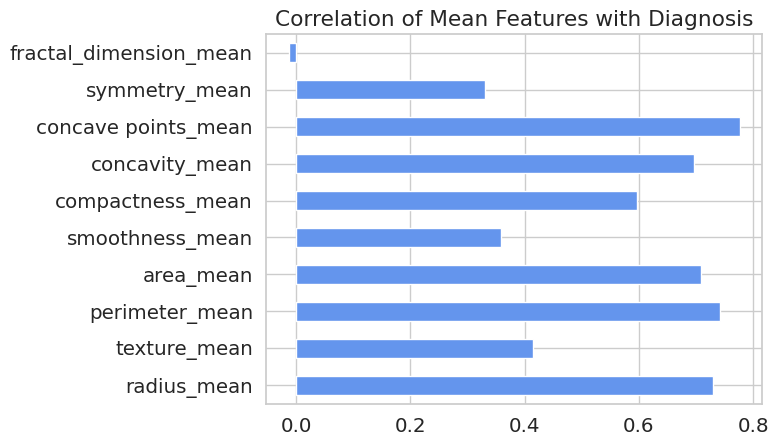

In [ ]:
features_mean.corrwith(data.diagnosis).plot(
    kind='barh',
    grid=True,
    title="Correlation of Mean Features with Diagnosis",
    color="cornflowerblue");

> Observations:
- `fractal_dimension_mean` is the least correlated with the target variable.
- All other mean features have a significant correlation with the target variable.

### **Correlation of Squared Error Features with Diagnosis**

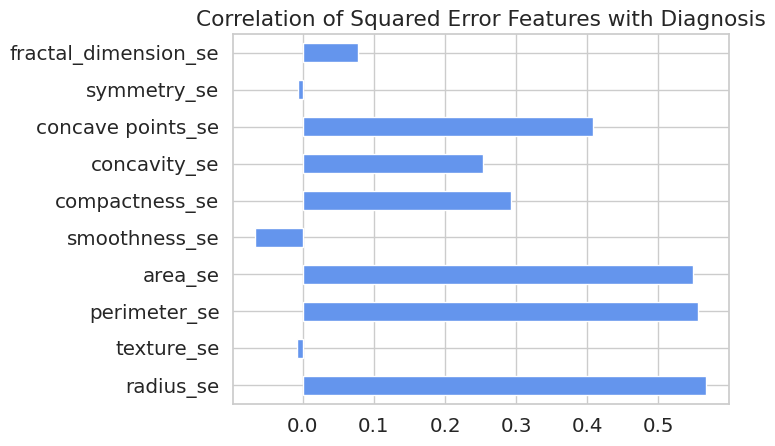

In [ ]:
features_se.corrwith(data.diagnosis).plot(
    kind='barh',
    grid=True,
    title="Correlation of Squared Error Features with Diagnosis",
    color="cornflowerblue");

> Observations:
- `texture_se, smoothness_se, symmetry_se, and fractal_dimension_se` are least correlated with the target variable.
- All other squared error features have a significant correlation with the target variable.

### **Correlation of Worst Features with Diagnosis**

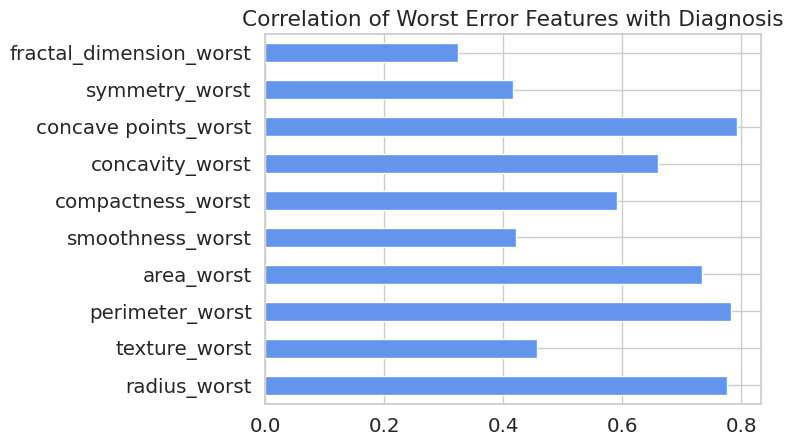

In [ ]:
features_worst.corrwith(data.diagnosis).plot(
    kind='barh',
    grid=True,
    title="Correlation of Worst Error Features with Diagnosis",
    color="cornflowerblue");

> Observation:
- All worst features have a significant correlation with the target variable.

### **Spotting the outliers**
> Although in the paper [1] & [2] the authors mention that "the features are numerically modeled such that larger values will typically indicate a higher likelihood of malignancy". That is why I think outlier analysis is pointless here. But we will try to check the outliers for subsets of data.

> There are some rare values in benign distribution. There values can be errors or rare events. These errors and rare events can be called outliers.

> Firstly let's check the outliers for subsets of data using boxplot.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

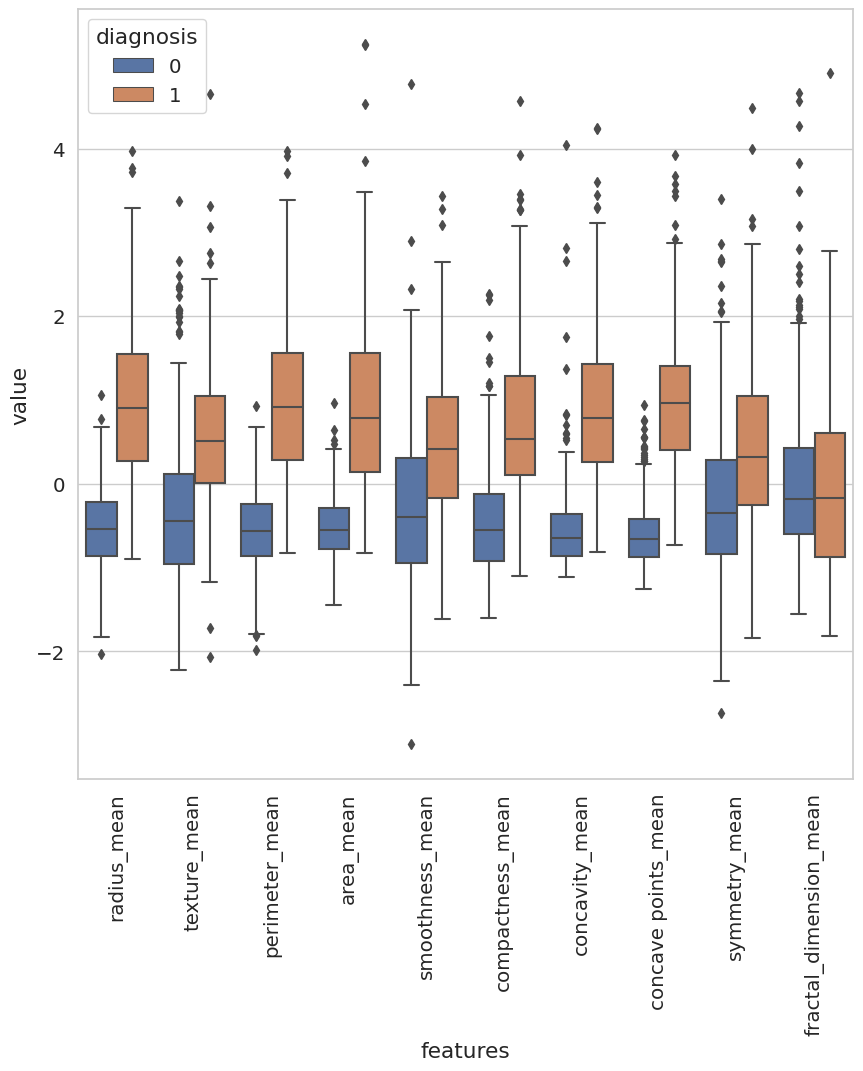

In [ ]:
# As an alternative of violin plot, box plot can be used in terms of seeing outliers

label = data['diagnosis']
outlier = features_mean
# outlier = features_se
# outlier = features_worst

scaled_data = (outlier - outlier.mean()) / (outlier.std()) # standardization
merged_data = pd.concat([label,scaled_data],axis=1)
fm = pd.melt(merged_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=fm)
plt.xticks(rotation=90)

> These values as referenced are rare values so we will not remove them from our analysis.

### **Correlation Matrix**

#### **Correlation Matrix**

> A correlation matrix shows the relation between two given variables in the form of a matrix. Such a matrix colored with a heat map will make it much easier to read.

> One of the assumptions in most of the key Machine learning models is that no variable in the model is highly correlated to any other variable. A high correlation between variables causes the problem of `multi-collinearity` and hence it's important to be aware of the relationships between each variable to better interpret the results of a model.
- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables

In [ ]:
# correlation map using plotly

def correlation_mat(df):
  correlation = df.corr()
  # tick labels
  matrix_cols = correlation.columns.tolist()
  # convert to array
  corr_array  = np.array(correlation)
  # Plotting
  trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   text=corr_array.round(2),
                   texttemplate="%{text}",
                   colorbar   = dict() ,
                  )
  layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
  fig = go.Figure(data = [trace],layout = layout)
  py.iplot(fig)

In [ ]:
# the entire features
correlation_mat(data)

In [ ]:
# correlation matrix for the subsets
correlation_mat(features_mean)
correlation_mat(features_se)
correlation_mat(features_worst)

> Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables. For instance, the **radius_mean** column has a correlation of 1 and 0.99 with **perimeter_mean** and **area_mean** columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis.

> Another place where multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the **radius_mean** column has a correlation of 0.97 with the **radius_worst** column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, I think we should discard the "worst" columns from our analysis and only focus on the "mean" columns.

> Similarly, it seems like there is multicollinearity between the attributes **compactness**, **concavity**, and **concave points**. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. I think **compactness** is an attribute name that is straightforward, so I will remove the other two attributes.

> We can now go ahead and drop all unnecessary columns, but let's have a deeper understanding of the data and we will do the feature selection later.

#### **Diagonal Correlation Matrix:**

> Since the correlation matrix is symmetrical, half of the coefficients are redundant. So, a diagonal correlation matrix can be used for an quick and easy viewing.

> We will do it on the data subsets to have a better understanding.

In [ ]:
# General correlation matrix function
def plt_cm(data):
  sns.set_style("white")

  # Get correlation matrix
  cm = data.corr()

  # Create triangular mask
  mask = np.zeros_like(cm, dtype = np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Establish heatmap
  data, ax = plt.subplots(figsize=(10, 10))
  plt.title('Breast Cancer Feature Correlation Matrix')

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(cm, vmax=1.2, square='square', cmap='RdBu', mask=mask, ax=ax,annot=True, linewidths=1)

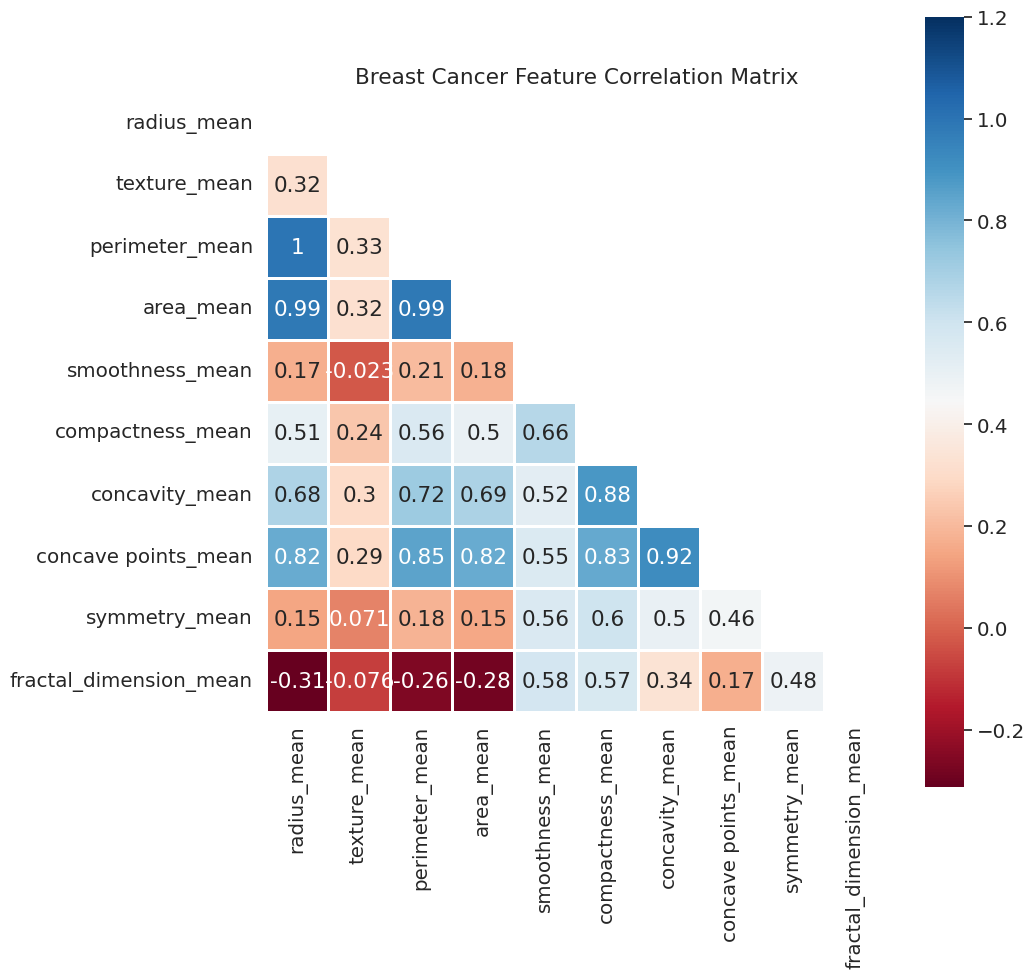

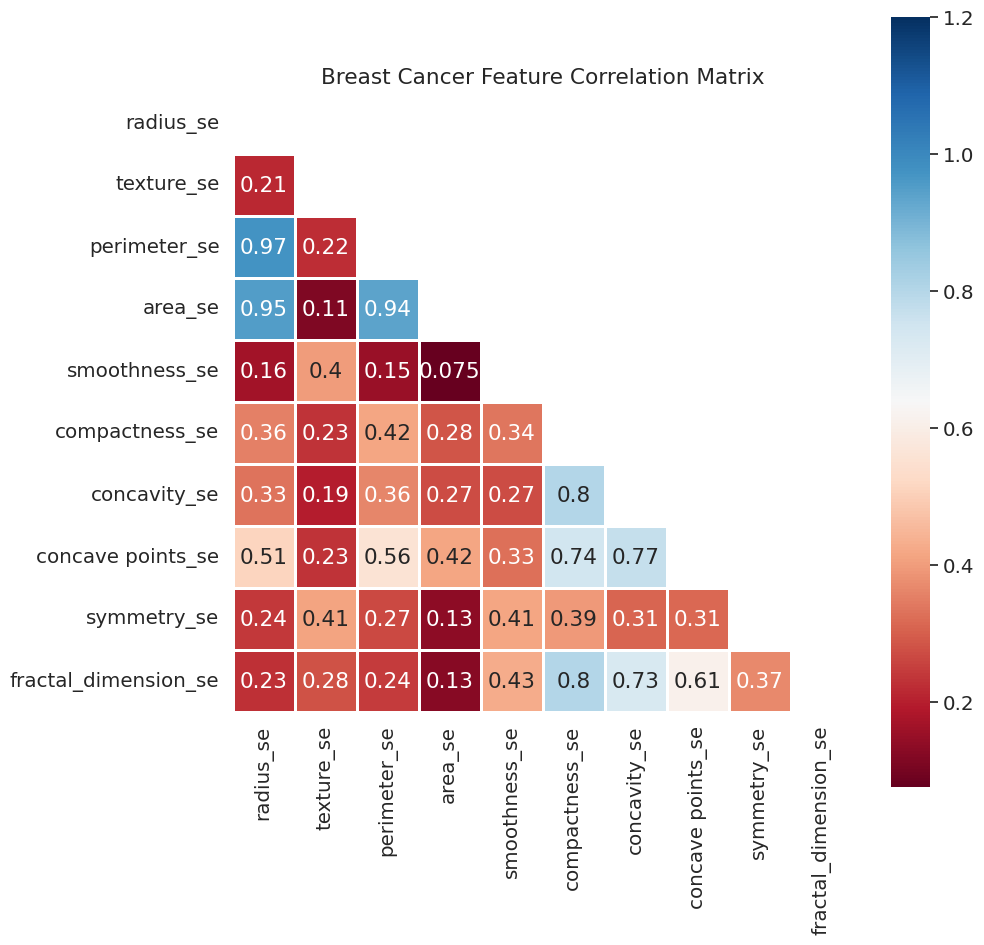

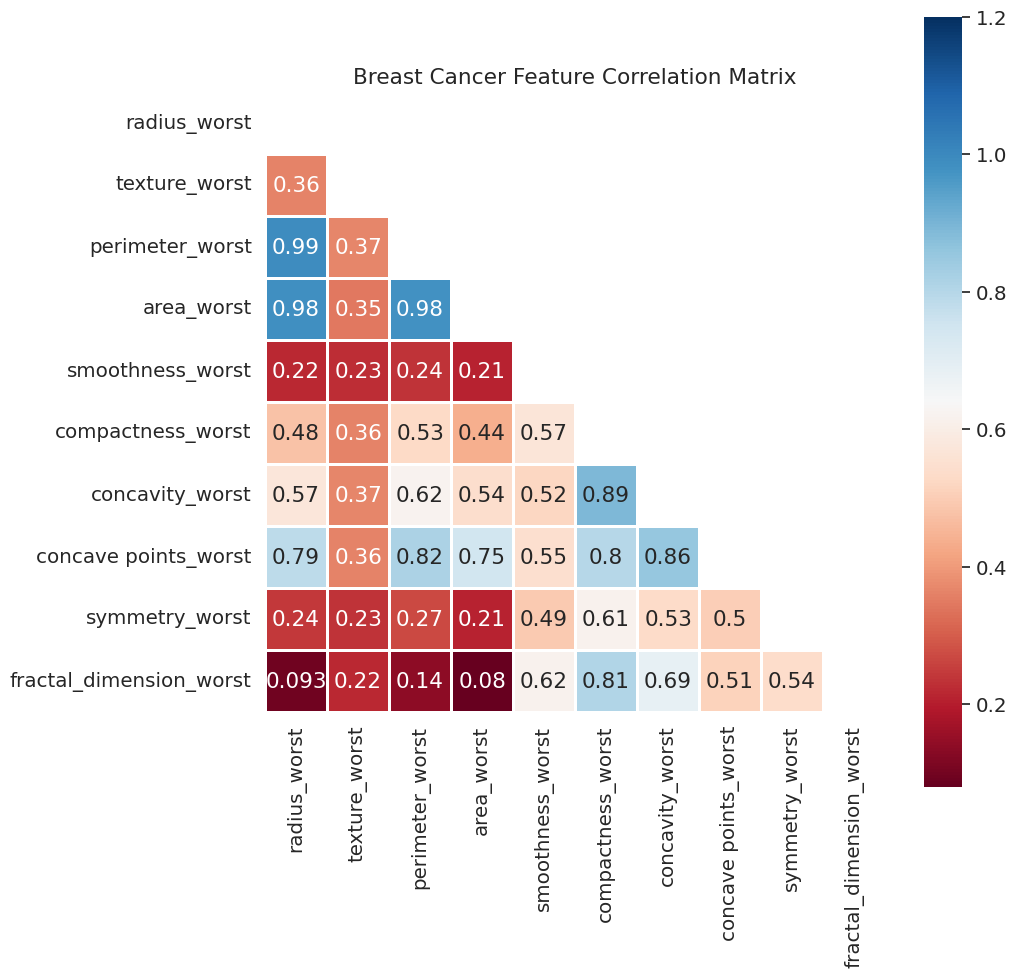

In [ ]:
# mean
plt_cm(features_mean)
# se
plt_cm(features_se)
# worst
plt_cm(features_worst)

> Observation:     
The diagonal plots are the kde-plots for each variable/feature. The upper and the lower triangle are essentially mirror images of each other.

> One major take-away from these plots to observe that there is a certain level of separation between the malignant and the benign data types which can make it helpful to use these features to design a machine learning algorithm.

    - Radius, Area and Perimeter are correlated (corr>0.9) which is obvious as area and perimeter is calculated using the radius values.
    - Texture_mean and texture_worst are higly correlated with corr_value = 0.98 (texture_worst is the largest value of all the textures).
    - Compactness_mean,concavity_mean,concave_points_mean are also highy correlated with values in range 0.7 to 0.9.
    - Symmetry_mean and symmetry_worst are correlated too by values 0.7.
    - Fractural_dimension_mean and fractural_dimension_worst are correlated by value 0.77

### **Features Distribution**

we will use pairplot which allows us to see both distribution of single variables and relation between a pair of variables from the given set of variables/features in a form of a matrix.

> Let's check the correlation & distribution between subset features for ease of visualizing.

In [ ]:
def paircorr(df):
  label = data['diagnosis']
  df = df
  scaled_data = (df - df.mean()) / (df.std()) # standardization
  dfc = pd.concat([label,scaled_data],axis=1)
  plt.figure(figsize=(10,10))
  sns.pairplot(data=dfc, hue = "diagnosis", diag_kind='kde',size=4)
  plt.xticks(rotation=90)

In [ ]:
paircorr(features_mean)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
paircorr(features_se)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
paircorr(features_worst)

Output hidden; open in https://colab.research.google.com to view.

*observation:*

 - the `radius, parameter and area` are highly correlated as expected from their relation so from these we will use any of them.
 - `compactness_mean, concavity_mean and concavepoint_mean` are highly correlated so we will use `compactness_mean` from here *

#### **Checking Multicollinearity Between Distinct Features:**

In [ ]:
def pairplot(dfp):
    label = data['diagnosis']
    df = dfp
    scaled_data = (df - df.mean()) / (df.std()) # standardization
    dfc = pd.concat([label,scaled_data],axis=1)
    name = str([x for x in globals() if globals()[x] is dfp][0])
    if name == 'features_mean':
        x = "Mean"
    elif name == 'features_se':
        x = "Squared Error"
    elif name == 'features_worst':
        x = "Worst"
    sns.pairplot(data=dfc, hue='diagnosis', palette='crest', corner=True).fig.suptitle('Pairplot for {} Featrues'.format(x), fontsize = 20)

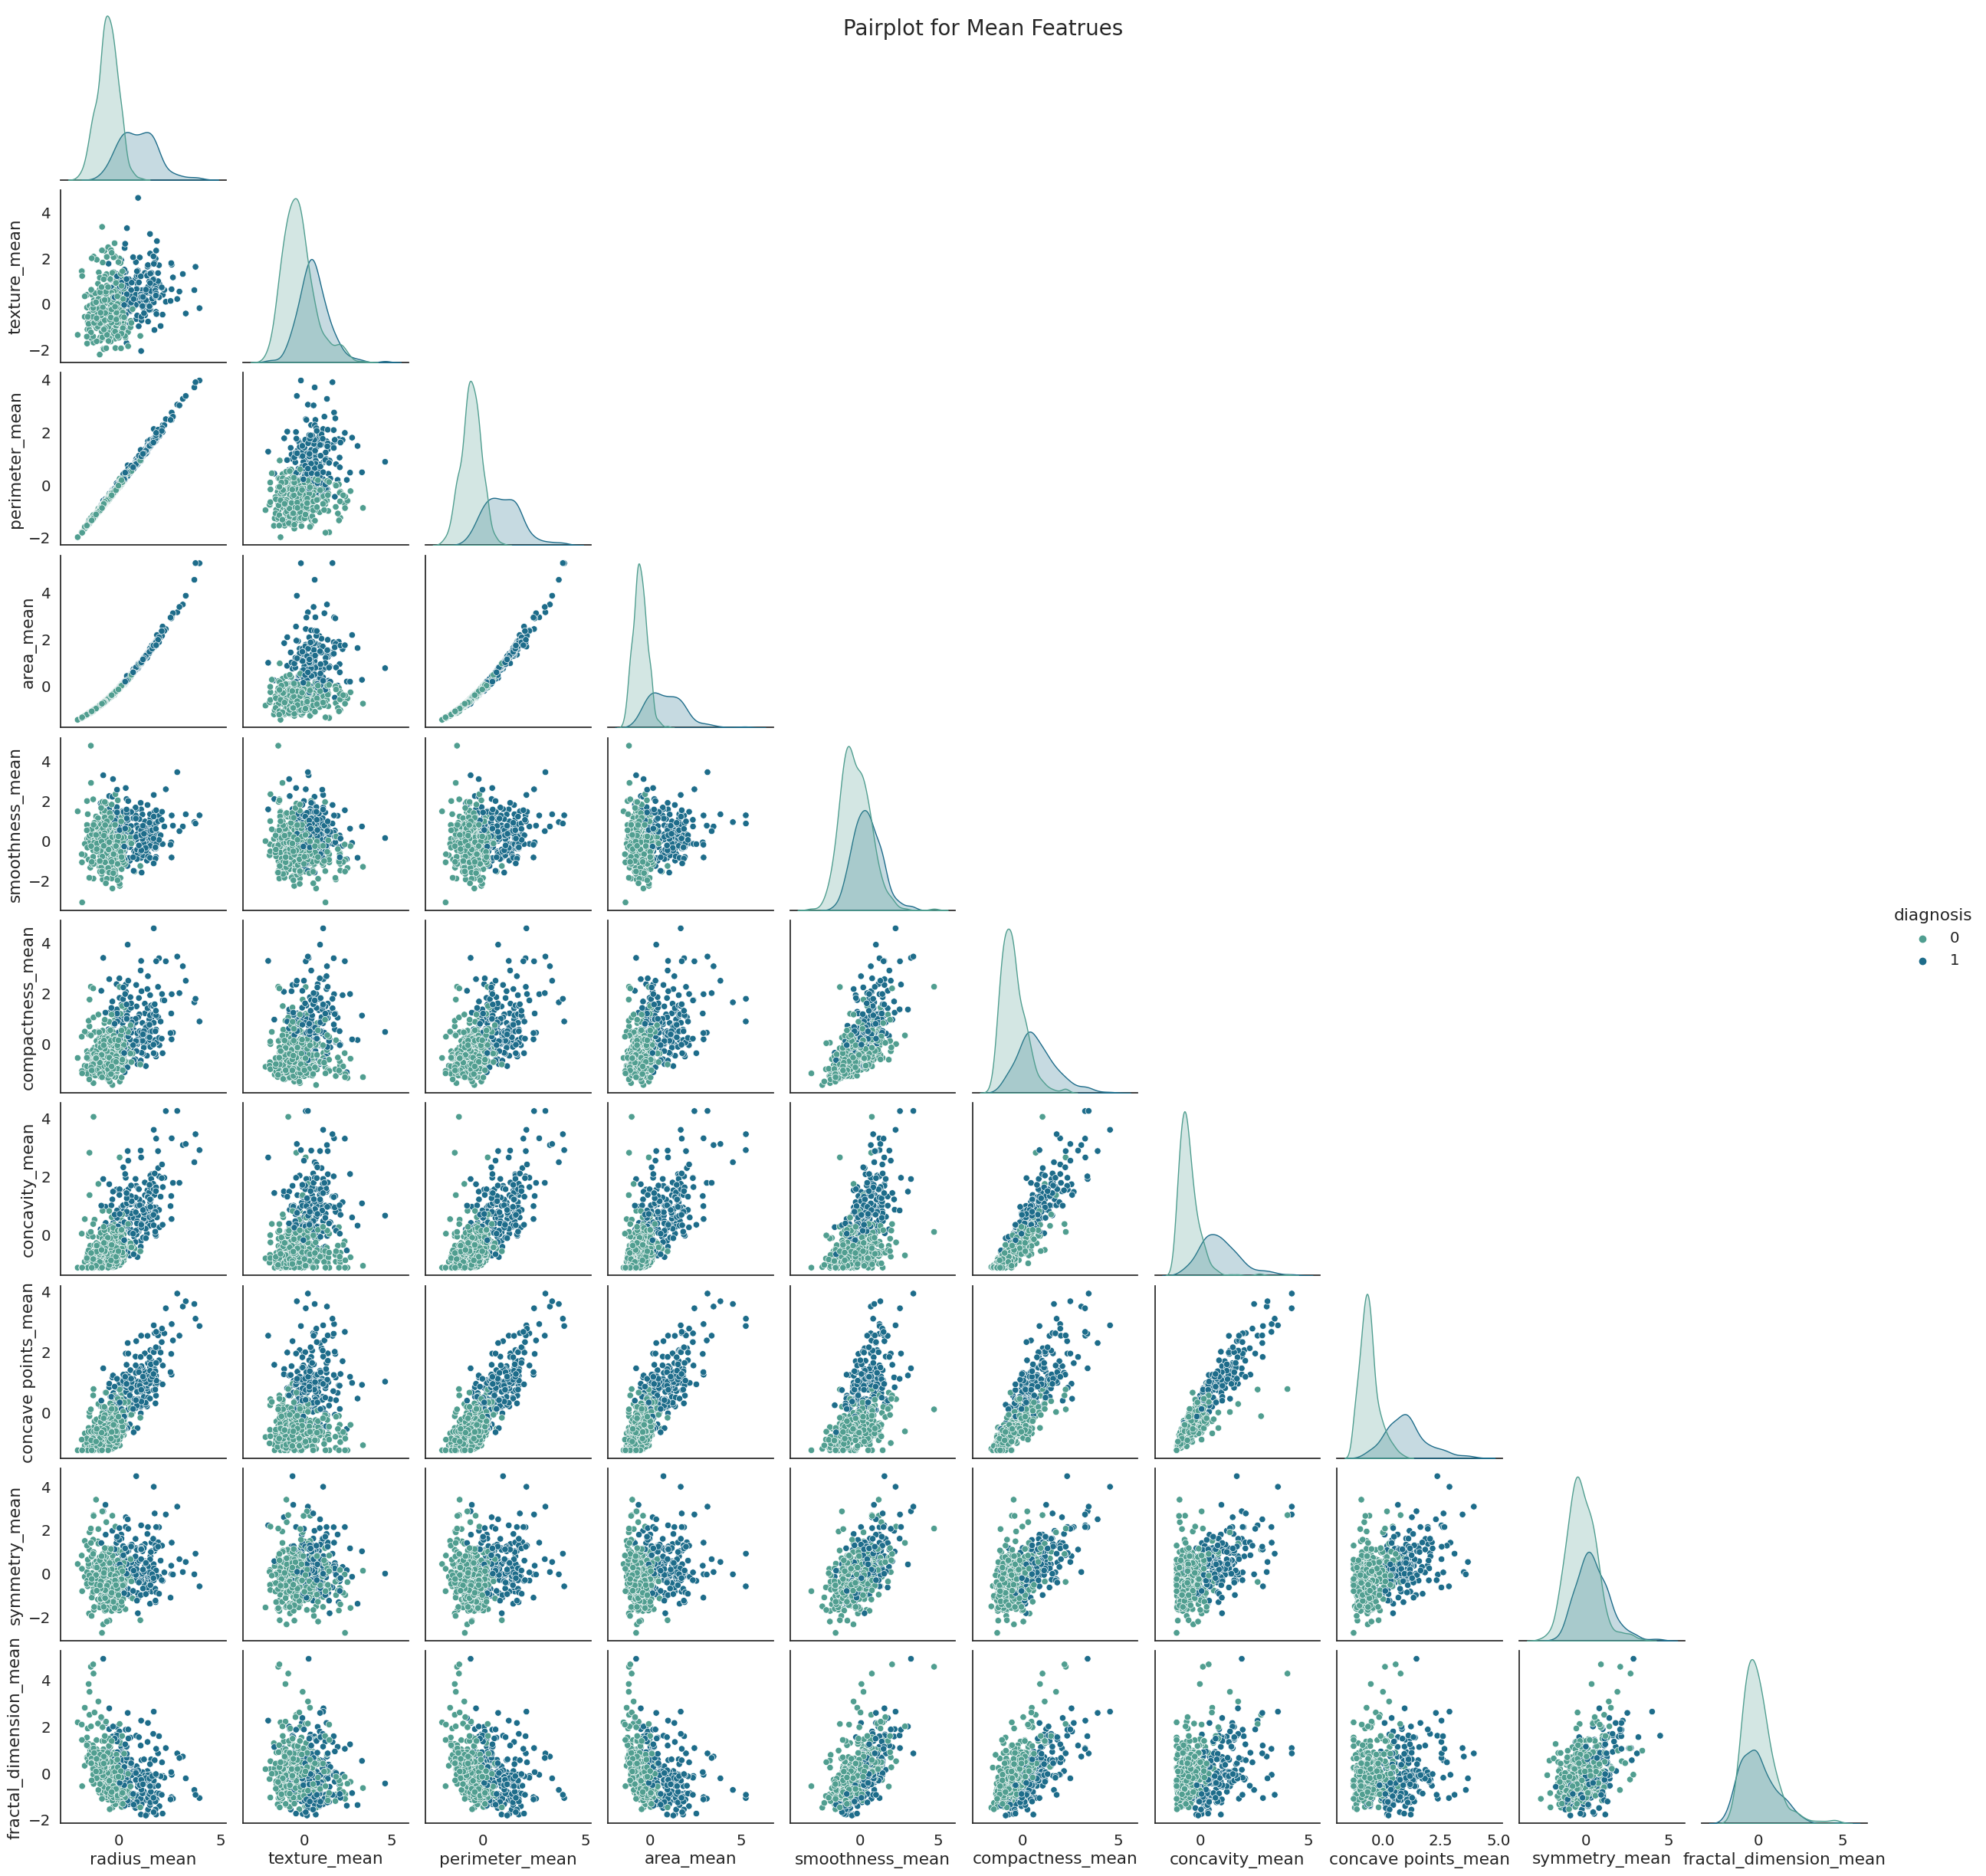

In [ ]:
pairplot(features_mean)

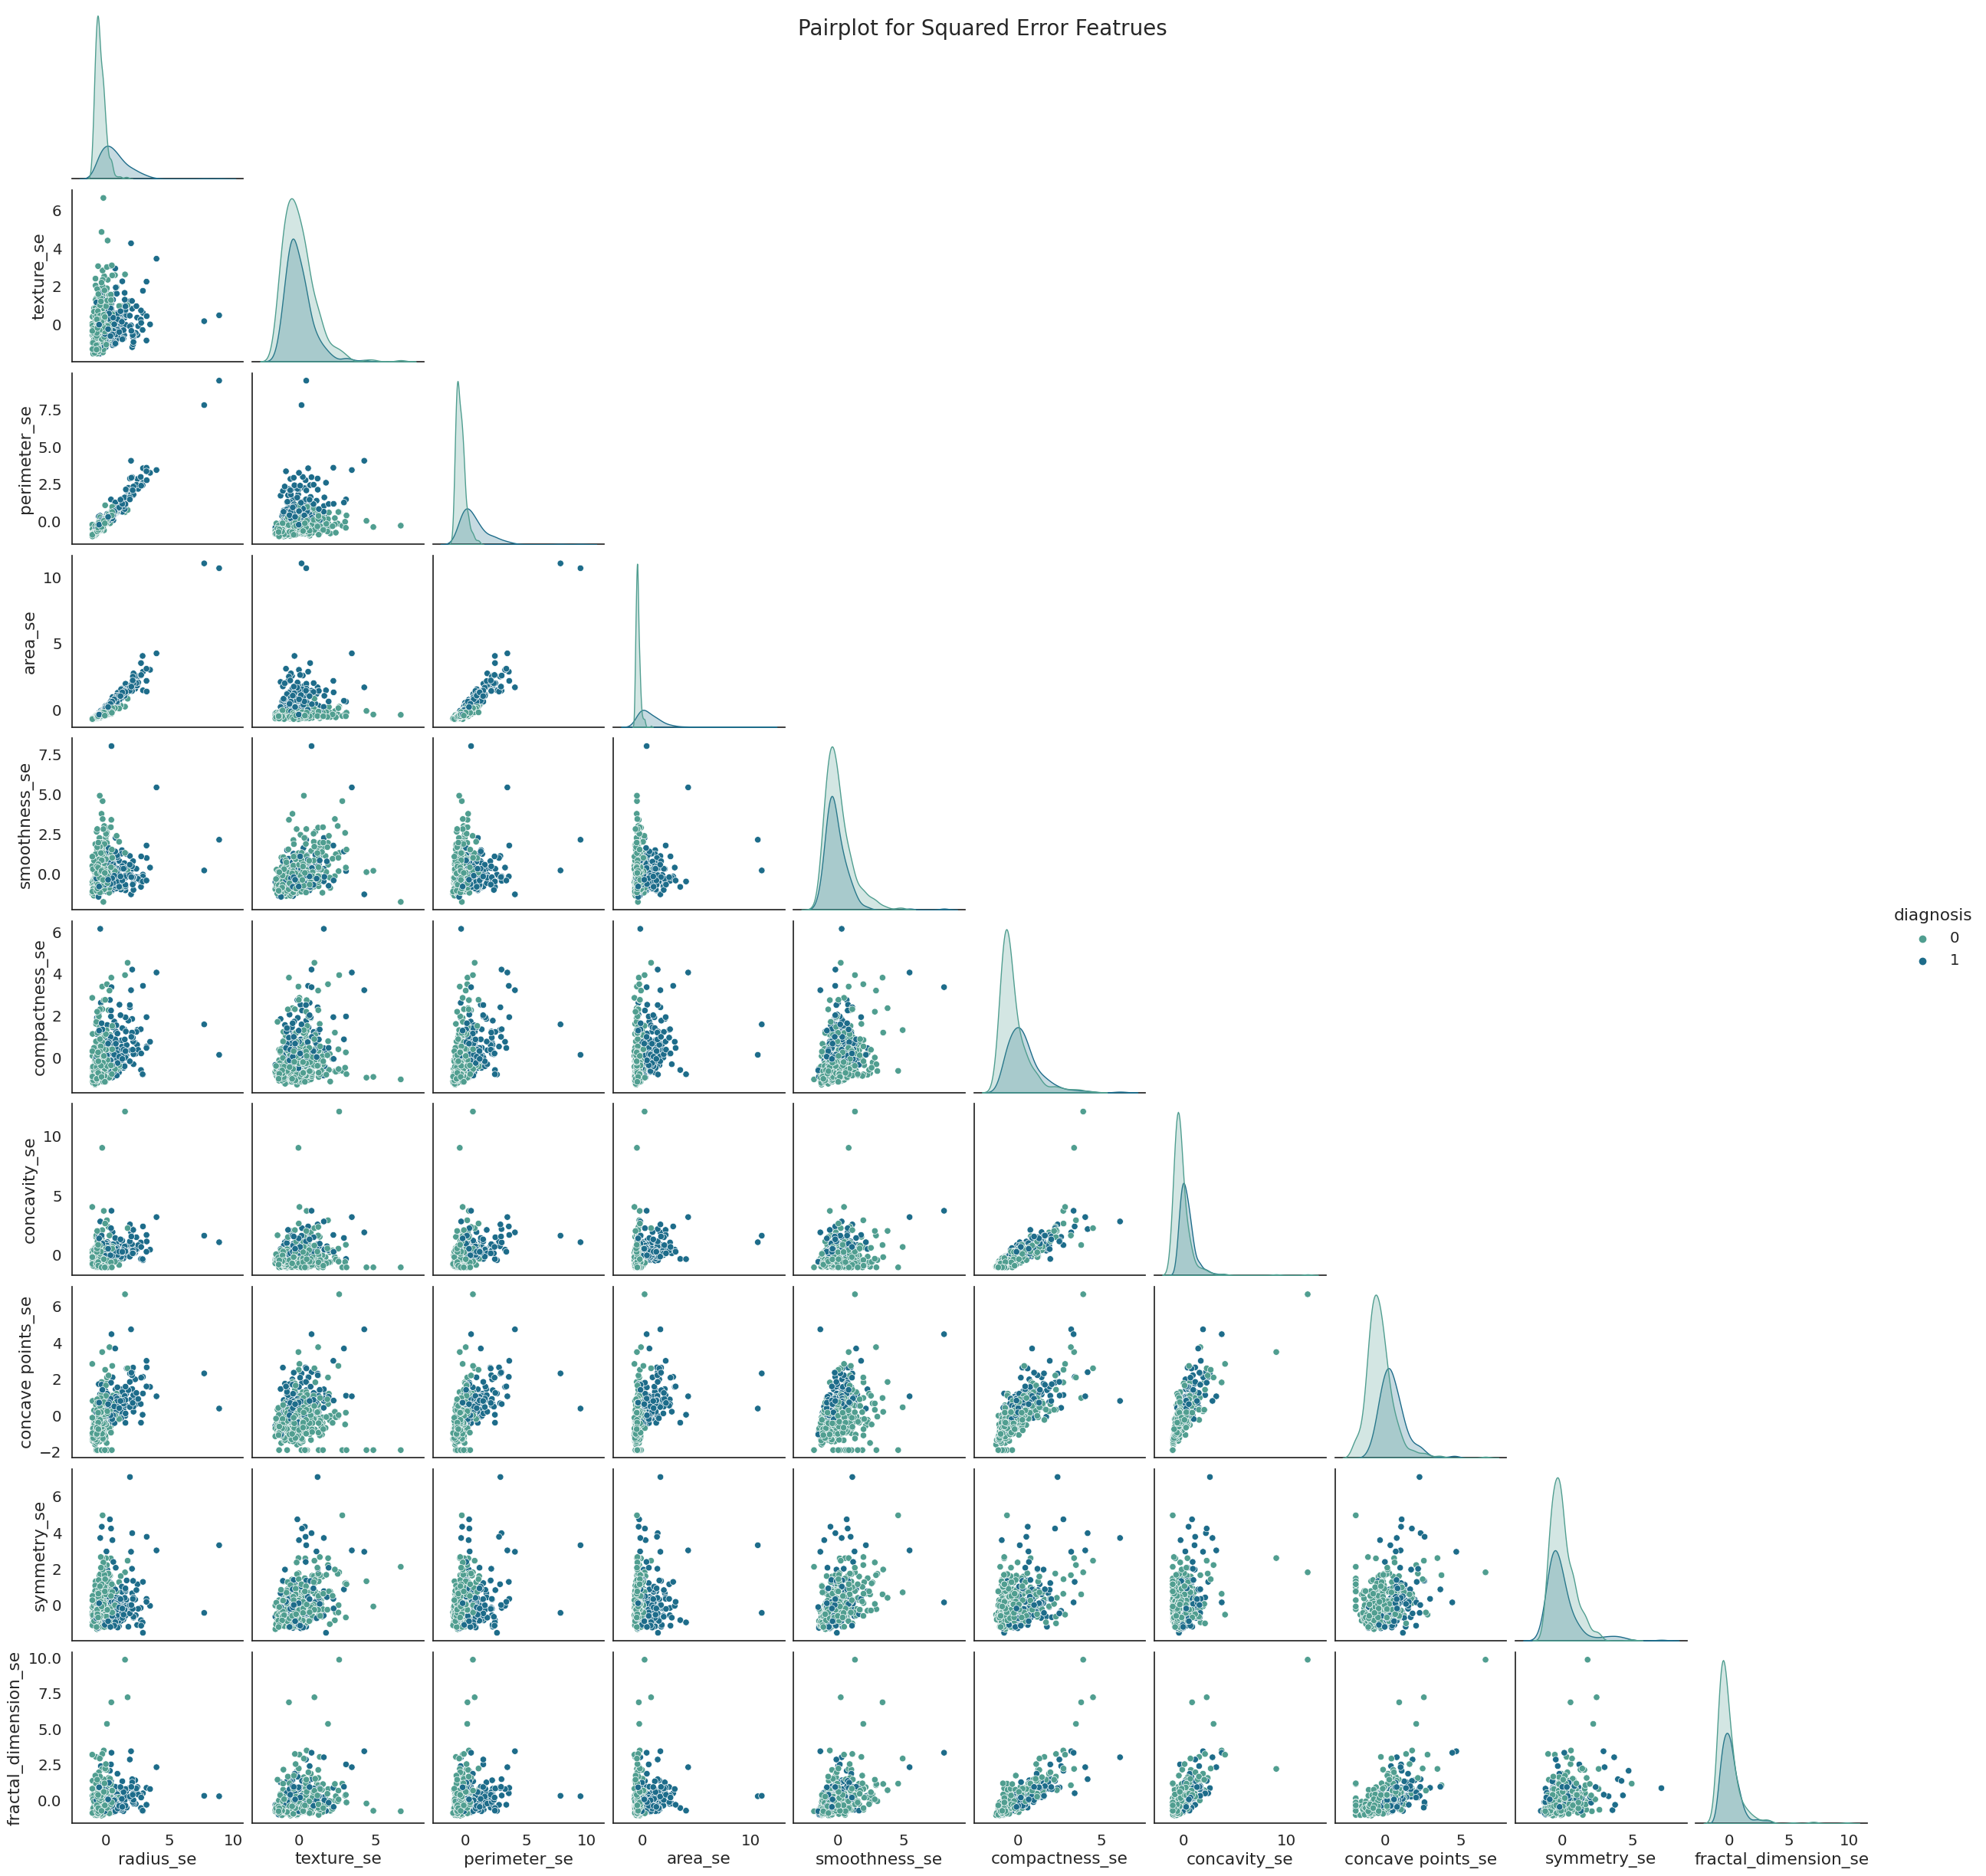

In [ ]:
pairplot(features_se)

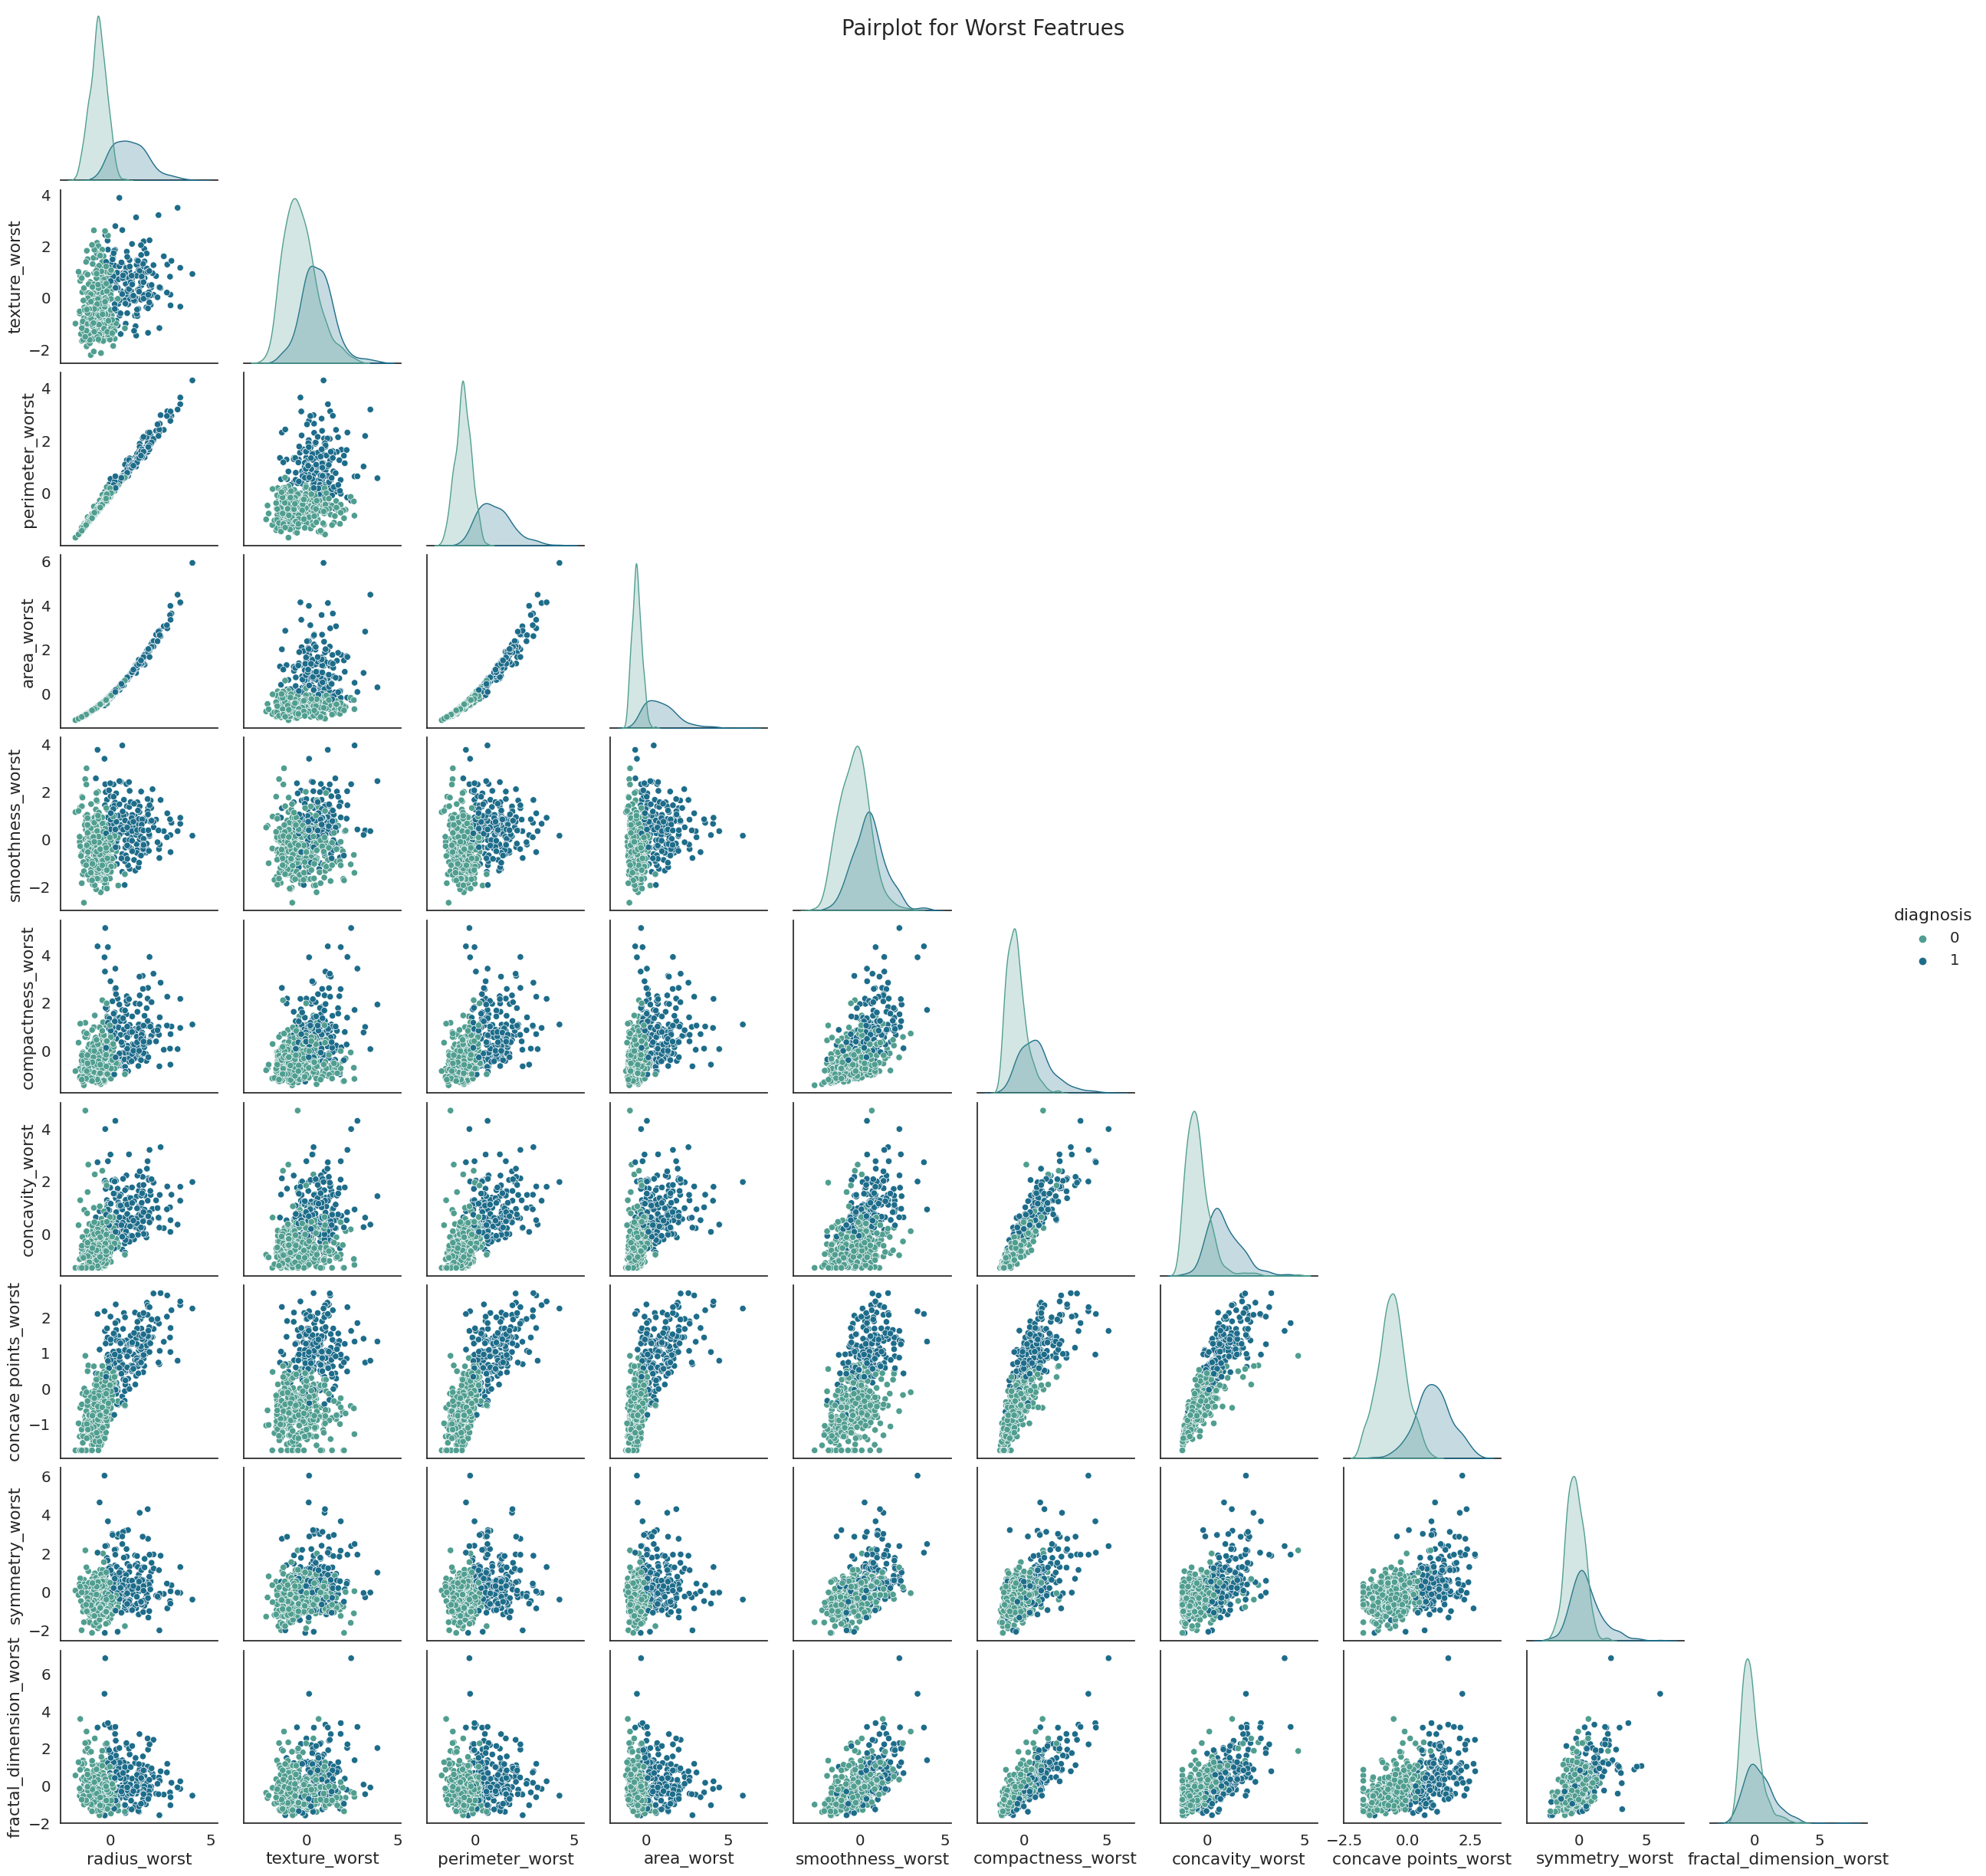

In [ ]:
pairplot(features_worst)

> Observations: Almost perfectly linear patterns between the `radius, perimeter, and area` attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the `concavity, concave_points, and compactness`.

#### **Density plots:**
These are smoothened versions of a histogram which plots the values of a feature/column in equally binned distributions and then smoothens it using kernel smoothing to create a well defined distribution shape.

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

In [ ]:
def violin(df):
  label = data['diagnosis']
  df_mean = df
  scaled_data = (df_mean - df_mean.mean()) / (df_mean.std()) # standardization
  concat = pd.concat([label,scaled_data],axis=1)
  melt = pd.melt(concat,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
  plt.figure(figsize=(10,10))
  sns.violinplot(x="features", y="value", hue="diagnosis", data=melt,split=True, inner="quart")
  plt.xticks(rotation=90)

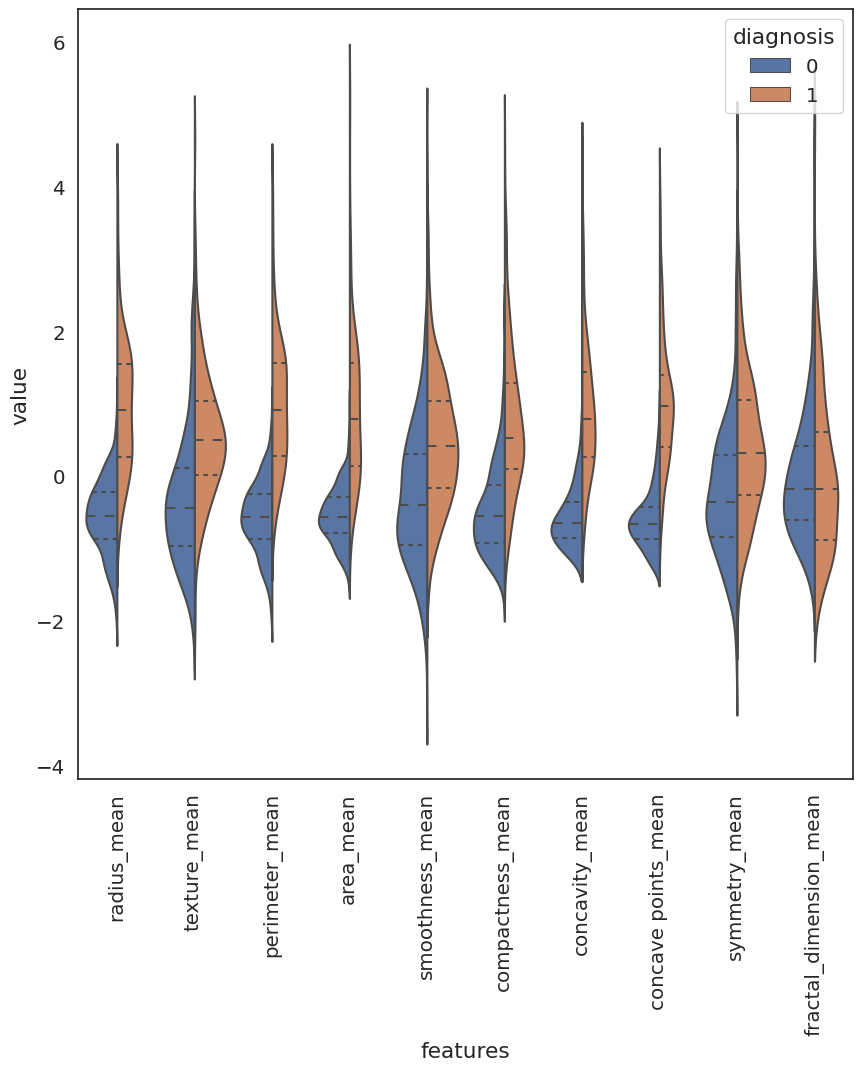

In [ ]:
# first ten features
violin(features_mean)

> in **texture_mean** feature, median of the *Malignant* and *Benign* looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

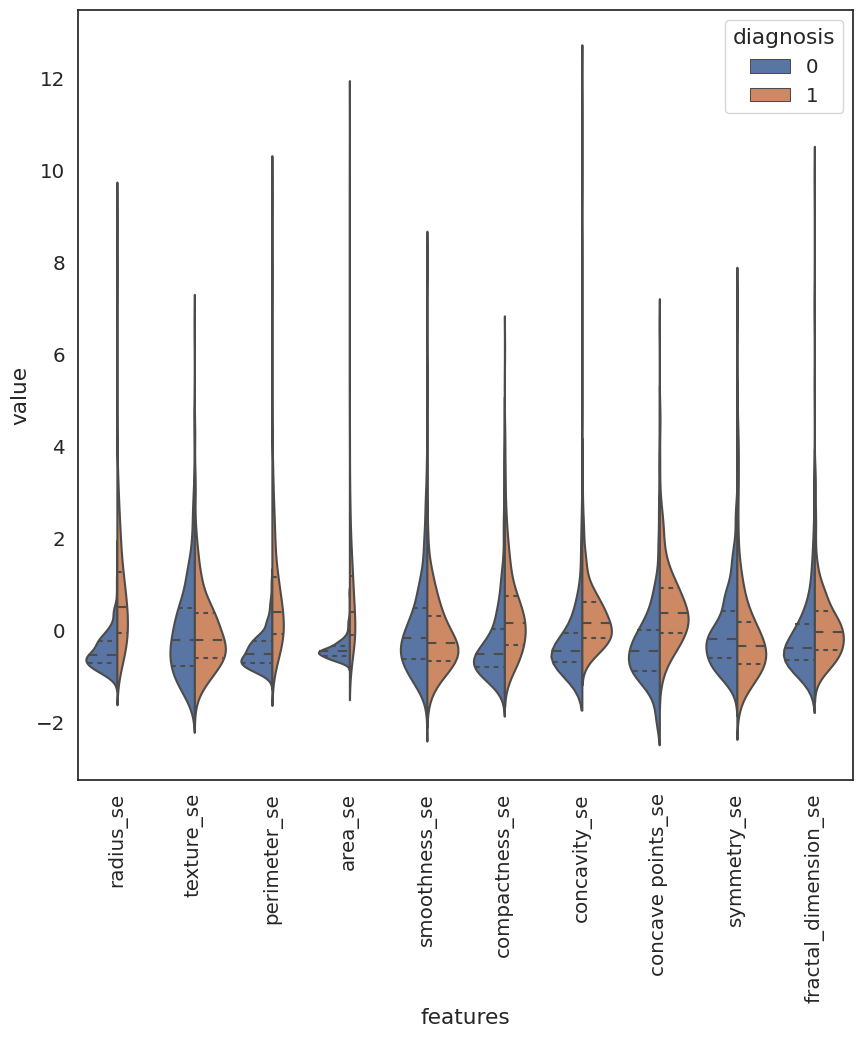

In [ ]:
# second ten features
violin(features_se)

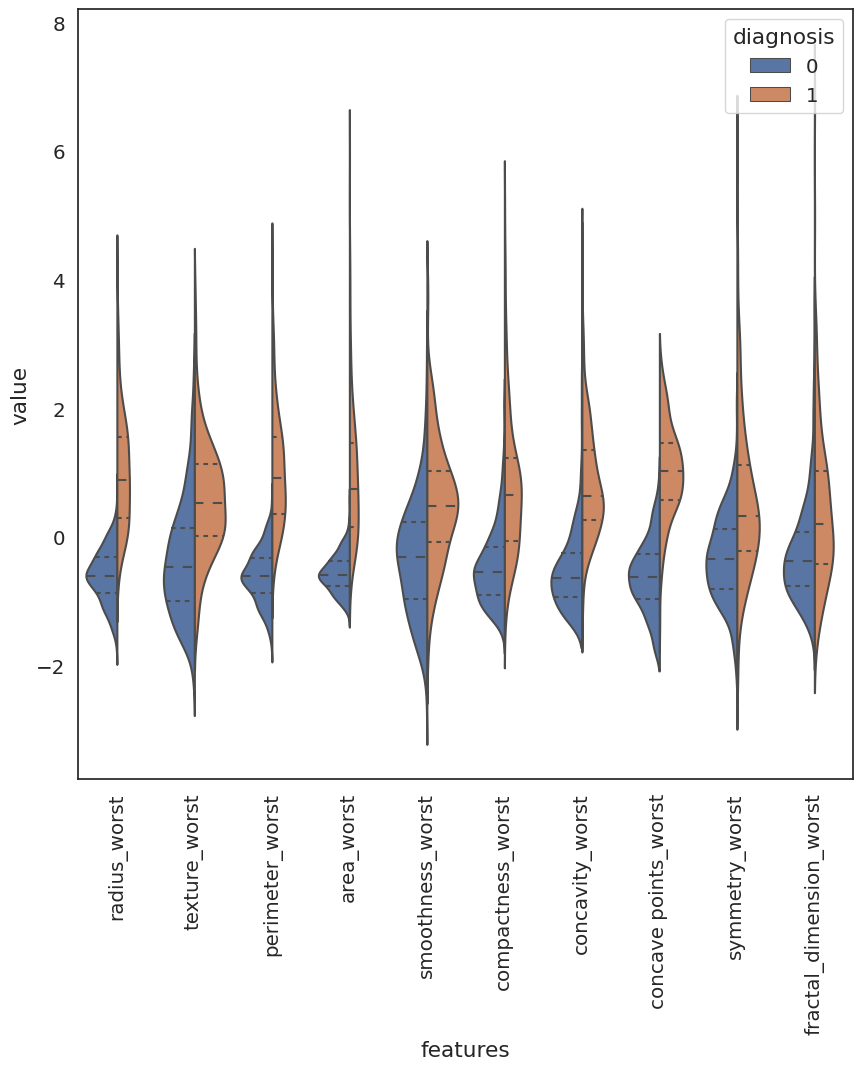

In [ ]:
# Last ten features
violin(features_worst)

Observations:

    Certain level of separation in the values for the radius, perimeter and area in the benign (diagnosis = 0) malignant (diagnosis =1)data points (as also observed in the diagonal plot of a pairplot)
    Each of the features appear to have outliers as shown in the boxplot and therefore needs to be addressed during data preprocessing.
    The distribution appears to be Gaussian with a right skew.

#### **Swarm Plot**

In [ ]:
def swarm(df):
  sns.set(style="whitegrid", palette="muted")

  label = data['diagnosis']

  df_mean = df

  scaled_data = (df_mean - df_mean.mean()) / (df_mean.std()) # standardization
  concat = pd.concat([label,scaled_data],axis=1)
  melt = pd.melt(concat,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
  plt.figure(figsize=(10,10))
  tic = time.time()
  # sns.swarmplot(x="features", y="value", hue="diagnosis", data=melt)
  sns.stripplot(x="features", y="value", hue="diagnosis", data=melt)
  plt.xticks(rotation=90)

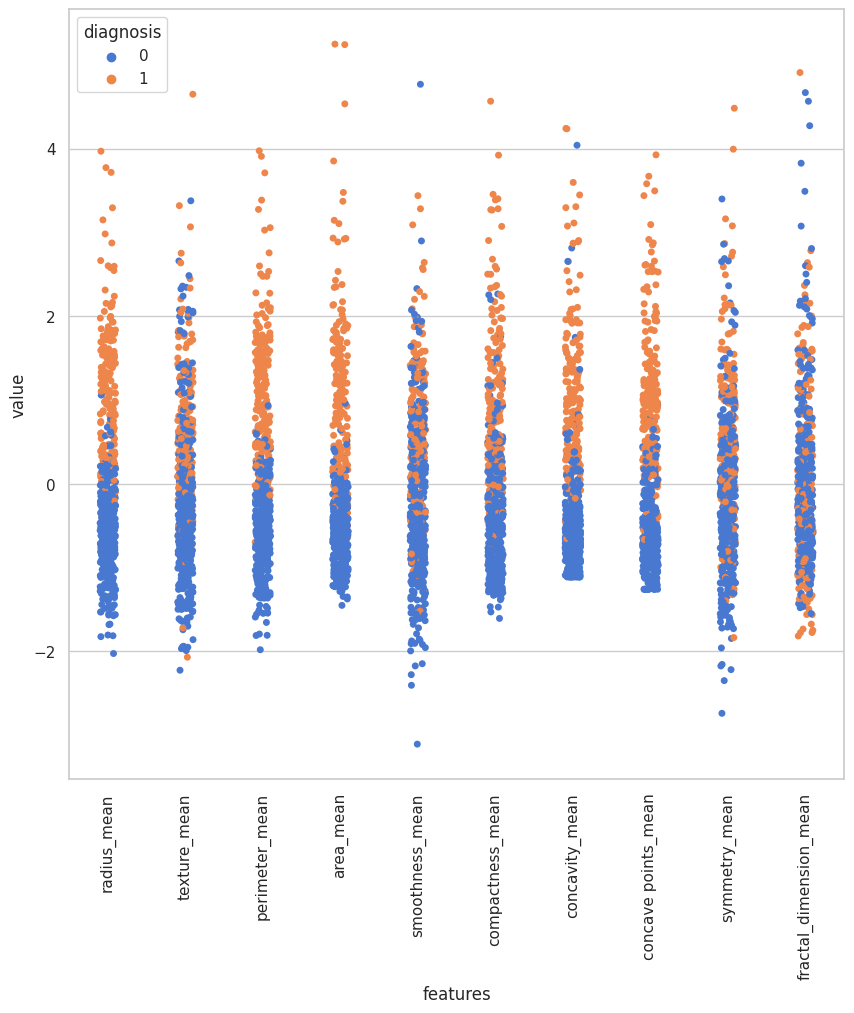

In [ ]:
# first ten features
swarm(features_mean)

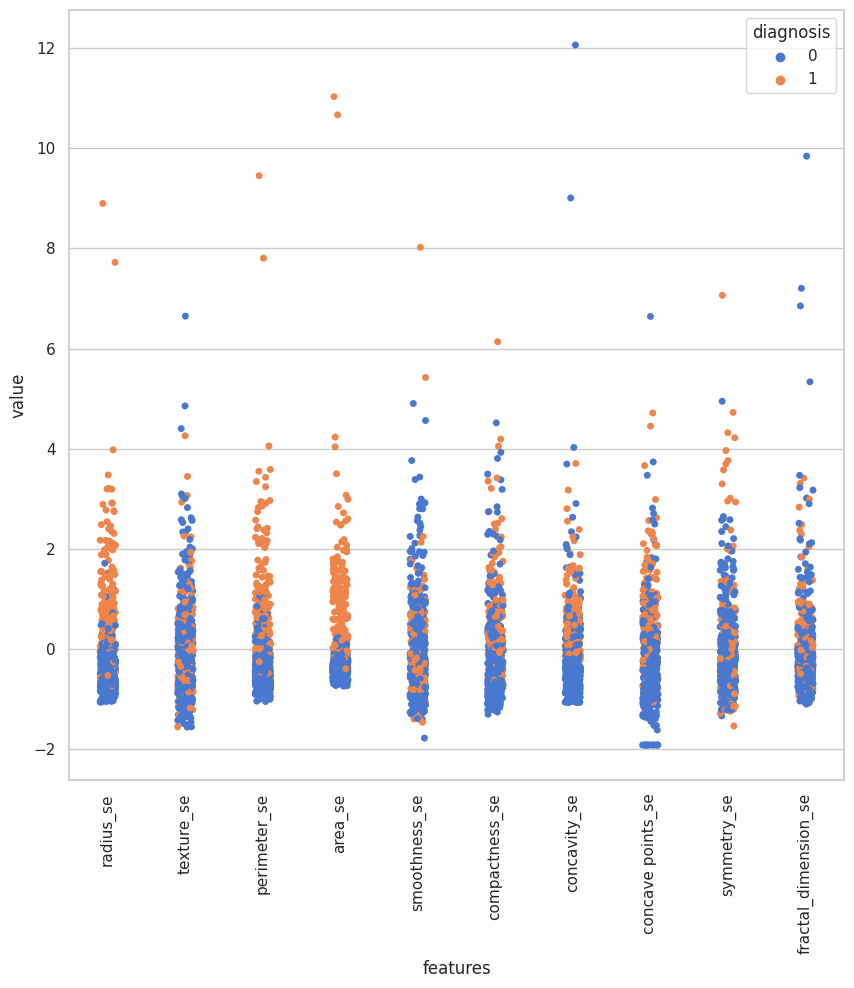

In [ ]:
# second ten features
swarm(features_se)

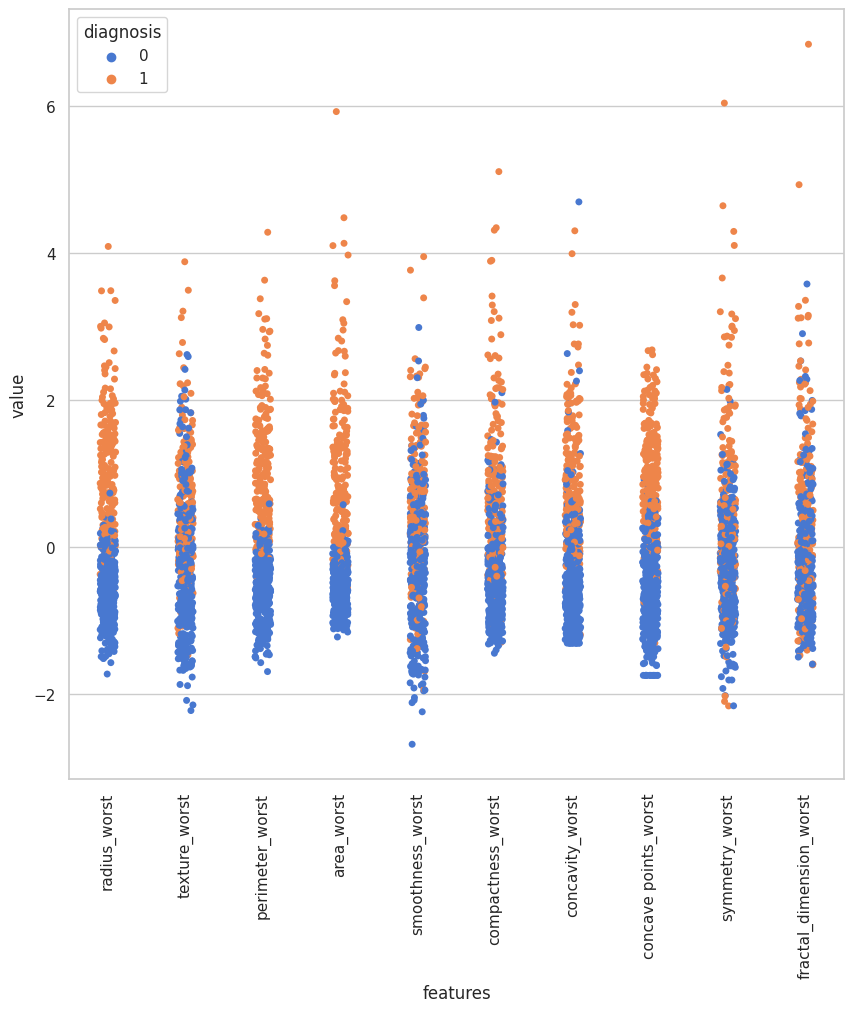

In [ ]:
# Last ten features
swarm(features_worst)

> We can see variance more clearly now. Let me ask you a question, **in these three plots which feature looks like more clear in terms of classification.** In my opinion **area_worst** in last swarm plot looks like malignant and benign are seperated not totaly but mostly. Hovewer, **smoothness_se** in swarmplot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

## **Feature Selection**

> a process of selecting a subset of relevant features from a large set of features to improve model performance, reduce the risk of overfitting, and reduce the computational time and cost. We're going to use feature selection with **Random Forest Classifier**


> In this part we will select feature with different methods that are:
- feature selection with correlation
- univariate feature selection
- recursive feature elimination (RFE)
- recursive feature elimination with cross validation (RFECV)

> We will use random forest classification in order to train our model and predict.

### **Feature Selection with Correlation**

> As it was seen in heatmap figure **radius_mean, perimeter_mean and area_mean** are correlated (by looking at swarm plots and **area_mean** looks like clear) with each other so we will use only **area_mean**.

> - **Compactness_mean, concavity_mean and concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**.
- Apart from these, **radius_se, perimeter_se and area_se** are correlated and I only use **area_se**.  
- **radius_worst, perimeter_worst and area_worst** are correlated so I use **area_worst**.  
- **Compactness_worst, concavity_worst and concave points_worst** so I use **concavity_worst**.
- **Compactness_se, concavity_se and concave points_se** so I use **concavity_se**.
- **texture_mean and texture_worst are correlated** and I use **texture_mean**.
- **area_worst and area_mean** are correlated, I use **area_mean**.




In [ ]:
# also chosen by RFECV
bestFeatures = ['area_mean','radius_mean', 'texture_mean', 'perimeter_mean', 'concavity_mean','concave points_mean', 'area_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst']
fsc = data[bestFeatures]
print(fsc.shape)
fsc.head()

(569, 15)


area_mean  radius_mean  texture_mean  perimeter_mean  concavity_mean  concave points_mean  area_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst
0     1001.0        17.99         10.38          122.80          0.3001              0.14710   153.40         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654
1     1326.0        20.57         17.77          132.90          0.0869              0.07017    74.08         24.99          23.41           158.80      1956.0            0.1238             0.1866           0.2416                0.1860
2     1203.0        19.69         21.25          130.00          0.1974              0.12790    94.03         23.57          25.53           152.50      1709.0            0.1444             0.4245           0.4504                0.2430
3      386.1        11.42         20.38           77.58          0.2414              0.10520    27.23         14.91          26.50            98.87       567.7            0.2098             0.8663           0.6869                0.2575
4     1297.0        20.29         14.34          135.10          0.1980              0.10430    94.44         22.54          16.67           152.20      1575.0            0.1374             0.2050           0.4000                0.1625

> After dropping correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Except one =0.9 that is the relationship between `concavity_mean & concavity_worst`

In [ ]:
correlation_mat(fsc)

> Well, we choose our features but **did we choose correctly ?** Let's use random forest and find accuracy according to chosen features.

Accuracy is:  0.9649122807017544


<Axes: >

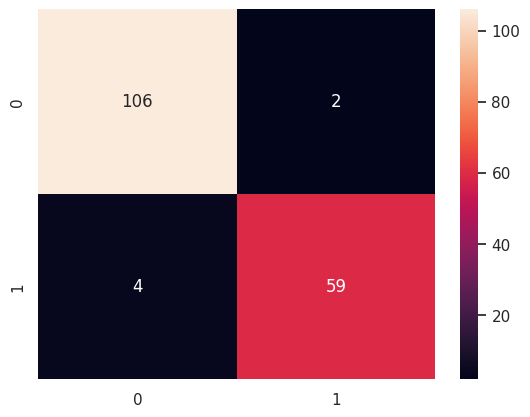

In [ ]:
fsc = data.drop('diagnosis',axis = 1)

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(fsc, data.diagnosis, test_size=0.3, random_state=42)

# random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

> Accuracy is around 96.49% and as it can be seen in confusion matrix, we made few wrong predictions.
Now let's see other feature selection methods to find better results.

### **Univariate Feature Selection with Chi-Squared Test**

> In univariate feature selection, we will use SelectKBest that removes all but the k-highest scoring features.

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively.

In [ ]:
# find best scored 5 features using Chi-squared test
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)
select_feature

SelectKBest(score_func=<function chi2 at 0x7f7a5e6689d0>)

In [ ]:
ufs_train = select_feature.transform(X_train)
ufs_test = select_feature.transform(X_test)
print("After selecting best 3 features:", ufs_train.shape)

After selecting best 3 features: (398, 10)


In [ ]:
print('Chosen best 10 feature by univariate FS:',X_train.columns[select_feature.get_support()])

Chosen best 10 feature by univariate FS: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'], dtype='object')


In [ ]:
# check out the best K features
BestK = X_train[[val for i,val in enumerate(X_train.columns) if select_feature.get_support()[i]]]
BestK[:5]

radius_mean  texture_mean  perimeter_mean  area_mean  perimeter_se  area_se  radius_worst  texture_worst  perimeter_worst  area_worst
149        13.74         17.91           88.12      585.0         1.573    21.47         15.34          22.46            97.19       725.9
124        13.37         16.39           86.10      553.5         1.223    14.66         14.26          22.75            91.99       632.1
421        14.69         13.98           98.22      656.1         4.795    49.45         16.46          18.34           114.10       809.2
195        12.91         16.33           82.53      516.4         1.493    15.75         13.88          22.00            90.81       600.6
545        13.62         23.23           87.19      573.2         2.066    31.24         15.35          29.09            97.58       729.8

> Best 5 features to classify are **area_mean, area_se, texture_mean, concavity_worst and concavity_mean**. So let's see what happens if we use only these best scored 5 feature.

Accuracy is:  0.9707602339181286


<Axes: >

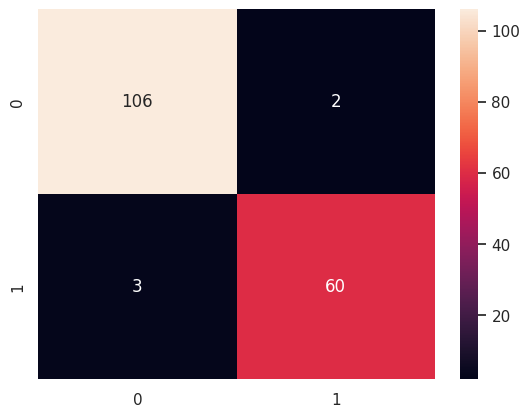

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=43)
clr_rf_2 = clf_rf_2.fit(ufs_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(ufs_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(ufs_test))
sns.heatmap(cm_2,annot=True,fmt="d")

In [ ]:
# correlation matrix for best K features
correlation_mat(BestK)

> After trying different folds, we observed that K=10 had the best accuracy with ~97% and the other two (K=5 & K=15) with 96.49. What we did up to now is that we chose features according to correlation matrix and according to selectkBest method. The accuracy via selectKBest got a little better.
Now let's see other feature selection methods to find better results.

> Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features.

### **Feature Selection with removing multicollinearity**

> We can see that there are many columns which are very highly correlated which causes multi-collinearity so we have to remove highly correlated features to have a better result.

In [ ]:
# selecting best 23 features using removing highly correlated features.
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]
data = data.drop(to_drop, axis = 1)
print(f"The reduced dataframe has {data.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [ ]:
correlation_mat(data)

> There are no more high correlation between variables as can be seen from the correlation matrix.

> We had the best result with this method so we'll choose it for further analysis.

## **Model Selection & Model Building**

> Involves building and developing a model that can accurately classify breast cancer cells as malignant or benign based on their features, which is used to improve diagnosis and treatment of breast cancer.

> We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make. If we omit this step, the model will be trained and tested on the same dataset, and it will underestimate the true error rate, a phenomenon known as **overfitting**. It is like writing an exam after taking a look at the questions and answers beforehand. We want to make sure that our model truly has predictive power and is able to accurately label unseen data. We will set the test size to 0.3; i.e., 70% of the data will be assigned to the training set, and the remaining 30% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 42.

### **Spliting the dataset**

In [ ]:
X = data.drop('diagnosis',axis = 1)
y = data.diagnosis  # M or B

### **Splitting to train and test sets**

![img](https://miro.medium.com/v2/resize:fit:640/format:webp/1*D8lr4VapywwLzVYph97JVg.png)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print('Samples in the test and train datasets are:')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Samples in the test and train datasets are:
X_train:  (398, 22)
y_train:  (398,)
X_test:  (171, 22)
y_test:  (171,)


> We divided the dataset by giving 70% to the train set and 30% to the test set.

### **Feature Scaling**

> Why do you need to standardize your data ? For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis


> We need to standardize our data to put all data points into mean of 0 and standard deviation of 1 since the total distribution of data follows the Gaussian Distribution and has a bell-shaped trend and skewed to the sides for most plots.

In [ ]:
scaler = StandardScaler() # create an instance of standard scaler
X_train = scaler.fit_transform(X_train) # fit and transform training data
X_test = scaler.transform(X_test) # transform test data

### **Initialization, Fitting and Predicting the model**


> In our dataset we have the outcome variable or Dependent variable i.e `y` having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm of supervised learning.

> We have different types of classification algorithms in Machine Learning:
1. Logistic Regression
2. K-Nearest Neighbor
3. Support Vector Machines
4. Naïve Bayes
5. Decision Tree Algorithm
6. Random Forest Classification

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''

    model.fit(X_train, y_train)  # fit the model instance

    y_pred = model.predict(X_test) # calculate predictions

    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={"size": 16}, fmt='g') # confusion matrix plotting

    # compute metrics for evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,pos_label=0)
    precision = precision_score(y_test, y_pred,pos_label=0)
    recall = recall_score(y_test, y_pred,pos_label=0)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

### **Model Selection**

Logistic Regression

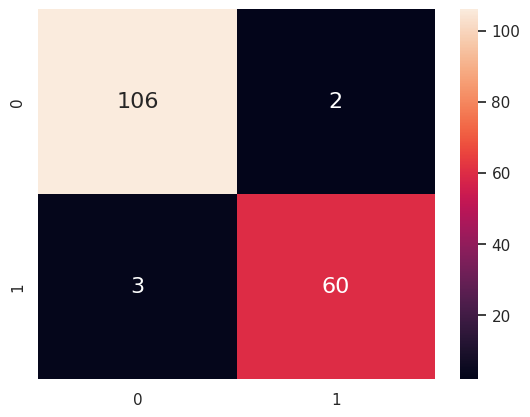

In [ ]:
lg = LogisticRegression(random_state = 0)
results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)
results.index = ['LogisticRegression']
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

Decision Tree

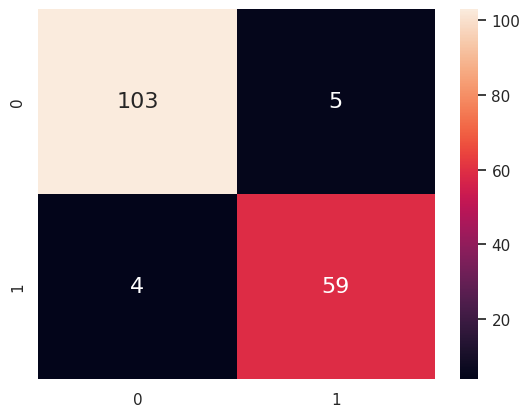

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 0)
# decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)
decision_tree_results.index = ['DecisionTree']
results = results.append(decision_tree_results)
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

K-Nearest Neighbors

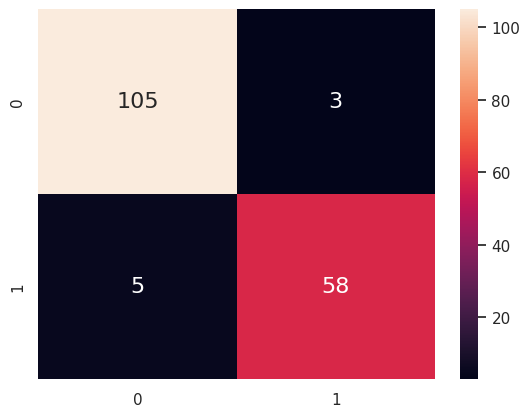

In [ ]:
KNN = KNeighborsClassifier()
# KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

RandomForestClassifer

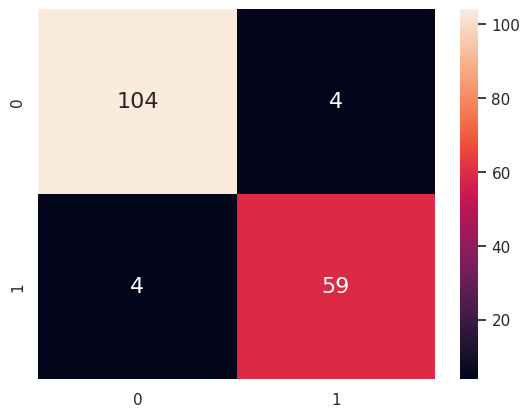

In [ ]:
rfc = RandomForestClassifier()
# rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']
results = results.append(rfc_result)
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

Naive Bayes

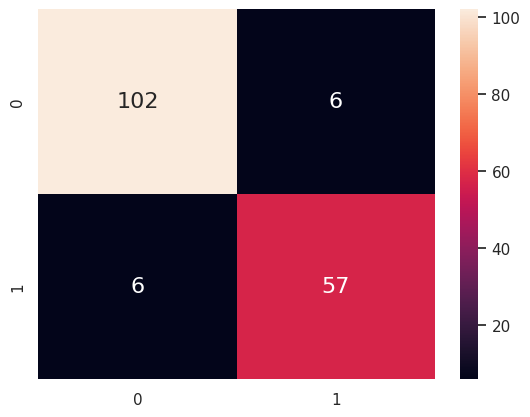

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']
results = results.append(Naive_Bayes_result)
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

SVC

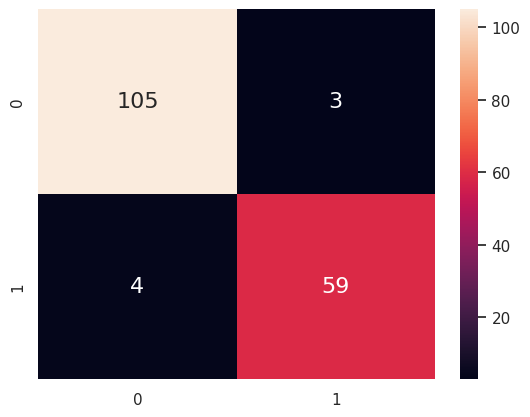

In [ ]:
svm = SVC()
# svm = SVC(kernel = 'linear', C = 10, gamma = 0.01,random_state = 0)
svm_result = train_evaluate_model(svm, X_train, y_train, X_test, y_test)
svm_result.index = ['SVM']
results = results.append(svm_result)
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
models = results.T.columns.values
models= models[0:7]

In [ ]:
models

array(['LogisticRegression', 'DecisionTree', 'KNearsNeighbors',
       'RandomForest', 'NaiveBayes', 'SVM'], dtype=object)

In [ ]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()


fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()


fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['precision'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()


fig = px.bar(x=results.iloc[:7,3].values, y =models,orientation='h',color=results['recall'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()


fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()


> Among all 6 models tested, Logistic Regression performed better than the others so we will choose this classifier for our further evaluation.

## **Model Evaluation**

> Involves measuring how accurately the model can predict the target on the testing data and using metrics such as accuracy, precision, recall, and F1-score, tuning the hyperparameters and their curves plots to assess its predictive power.

### **Evaluating & Plotting Model Performance**

#### **Confusion Matrix:**
> The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :
* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant
* false negative (FN) : Malignant tumour incorrectly identified as benign


#### **Metrics:**
* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)
* F1-score: 2 * (precision * recal) / (precision + recall)
* Balanced Accuracy: 1/2 (TP/(TP+FN)) (TN/(TN+FP))

#### **ROC & AUC**
> ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

#### **The ROC Curve**
> The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

#### **Cross-validation**
> Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.



In [ ]:
def show_metrics(yp):
    # compute metrics for evaluation
    accuracy = accuracy_score(y_test, yp)
    f1 = f1_score(y_test, yp)
    precision = precision_score(y_test, yp)
    recall = recall_score(y_test, yp)
    balanced_accuracy = balanced_accuracy_score(y_test, yp)
    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'],index=['LogisticRegression'])
    return eval_df

# plotting the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

### **Optimise & Tune Hyperparameters**

> **Need of hyperparameter tuning**
- To avoid over-fitting
- To avoid under-fitting

> **Process of hyperparameter tuning**    
In model optimization we split the data into three part
- train-train the model on the given parameter
- cv-optimize the model's parameter values
- test-evaluate the optimized model

> Hyperparameter tuning is an optimization technique and is an essential aspect of the machine learning process. A good choice of hyperparameters may make your model meet your desired metric. Yet, the plethora of hyperparameters, algorithms, and optimization objectives can lead to an unending cycle of continuous optimization effort.

#### **GridSearchCV**

> ***Important GridSearchCV argument***
- model    
    Choose the model which you want to pass like-Random forest,decision tree etc
- param_grid     
    Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries
- scoring    
    Strategy to evaluate the performance of the cross-validated model on the test set
- n_jobs     
    Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
- cv     
    Determines the cross-validation splitting strategy. Possible inputs for cv are:
    - None, to use the default 5-fold cross validation
    - integer, to specify the number of folds in a (Stratified)KFold
    - CV splitter
    - An iterable yielding (train, test) splits as arrays of indices.


### **Logistic Regression Hyperparameter Tuning**

> We now try to tune Logistic Regression Hyperparameteres although it does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

    solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

Regularization (penalty) can sometimes be helpful.

    penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.

    C in [100, 10, 1.0, 0.1, 0.01]


In [ ]:
lg = LogisticRegression()

In [ ]:
%%time
param_grid = {'solver' : ['saga','liblinear'],
              'penalty' : ['l1','l2'],
              'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }
grid_search_lg = GridSearchCV(
    estimator = LogisticRegression(random_state = 43,max_iter=500),
    param_grid = param_grid ,
    scoring = 'accuracy',
    verbose = 1,
    n_jobs = -1
    )
grid_search_lg.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
CPU times: user 316 ms, sys: 80.1 ms, total: 396 ms
Wall time: 17.8 s


GridSearchCV(estimator=LogisticRegression(max_iter=500, random_state=43),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# best parameters
print(grid_search_lg.best_params_)
# best score
print(grid_search_lg.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.9748101265822784


In [ ]:
# fitting Logistic Regression with its best parameters

# lg = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga')
lg = LogisticRegression(C = 1, penalty = 'l2', solver = 'saga')

lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

# accuracy score
print('training accuracy: ',accuracy_score(y_train, lg.predict(X_train)))
print('testing accuracy: ', accuracy_score(y_test, lg.predict(X_test)))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

training accuracy:  0.9824120603015075
testing accuracy:  0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]


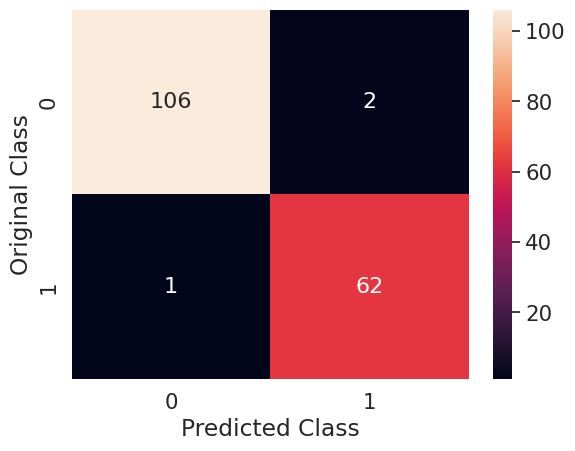

In [ ]:
# plt.figure(figsize=(8,8))
gridlg = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gridlg, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

AUC score: 0.996031746031746


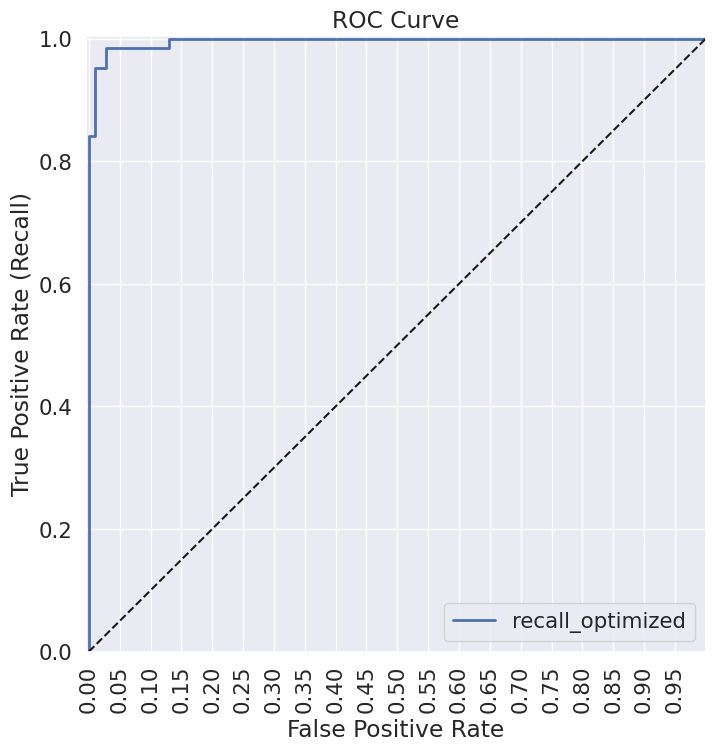

In [ ]:
# plotting ROC curve
y_scores = grid_search_lg.predict_proba(X_test)[:, 1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print('AUC score:',auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [ ]:
# Cross validation metrics
cross_val_metrics(grid_search_lg)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
[accuracy] : 0.97190 (+/- 0.00651)
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
[precision] : 0.96300 (+/- 0.01850)
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits

In [ ]:
# show metrics
show_metrics(lg.predict(X_test))

accuracy  f1_score  precision    recall  balanced_accuracy
LogisticRegression  0.982456  0.976378    0.96875  0.984127           0.982804

> ### The balanced accuracy of Logistic Regression increased from 96.69 to around 98.28 using GridSearchCV.

> - We started by analyzing the data types of the feature and converted the string data type to integer (using hot encoding). We Also Checked the distribution of the target variable.
- We then checked for missing values and duplicates and dealt with them.
- Further, we dropped certain features that upon analysis, we found to be irrelevant to the target variable and have multicollinearity.
- After performing preliminary analysis, we plotted the data to get more insights using EDA (exploratory data analysis) methods.
- We found the correlation of all the features with the target variable as well as among each other. We then found the 22 most optimal features by removing highly correlated variables. We have reduced the number of features from 30 to 22.
- We then implemented multiple classifiers and selected Logistic Regression as our best classifier for further analysis with 96.69% accuracy.
- We also increased the accuracy of our model from ~96.6% to ~98.2% during the process using hyperparameter tuning.